In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_train = pd.read_pickle("data/train.pickle")
x = df_train.iloc[:, 1:]
y = df_train["target"]

In [28]:
x.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.522699,-2.3978,7.8784,8.5635,12.780300,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.430500,2.0339,8.1267,8.7889,18.356001,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.604200,3.1417,-6.5213,8.2675,14.722200,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.034700,-1.2706,-2.9275,10.2922,17.969700,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.287600,-1.5121,3.9267,9.5031,17.997400,-8.8104


In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(solver="saga", max_iter=1000)
ridge.fit(x_scaled,y)

Ridge(max_iter=1000, solver='saga')

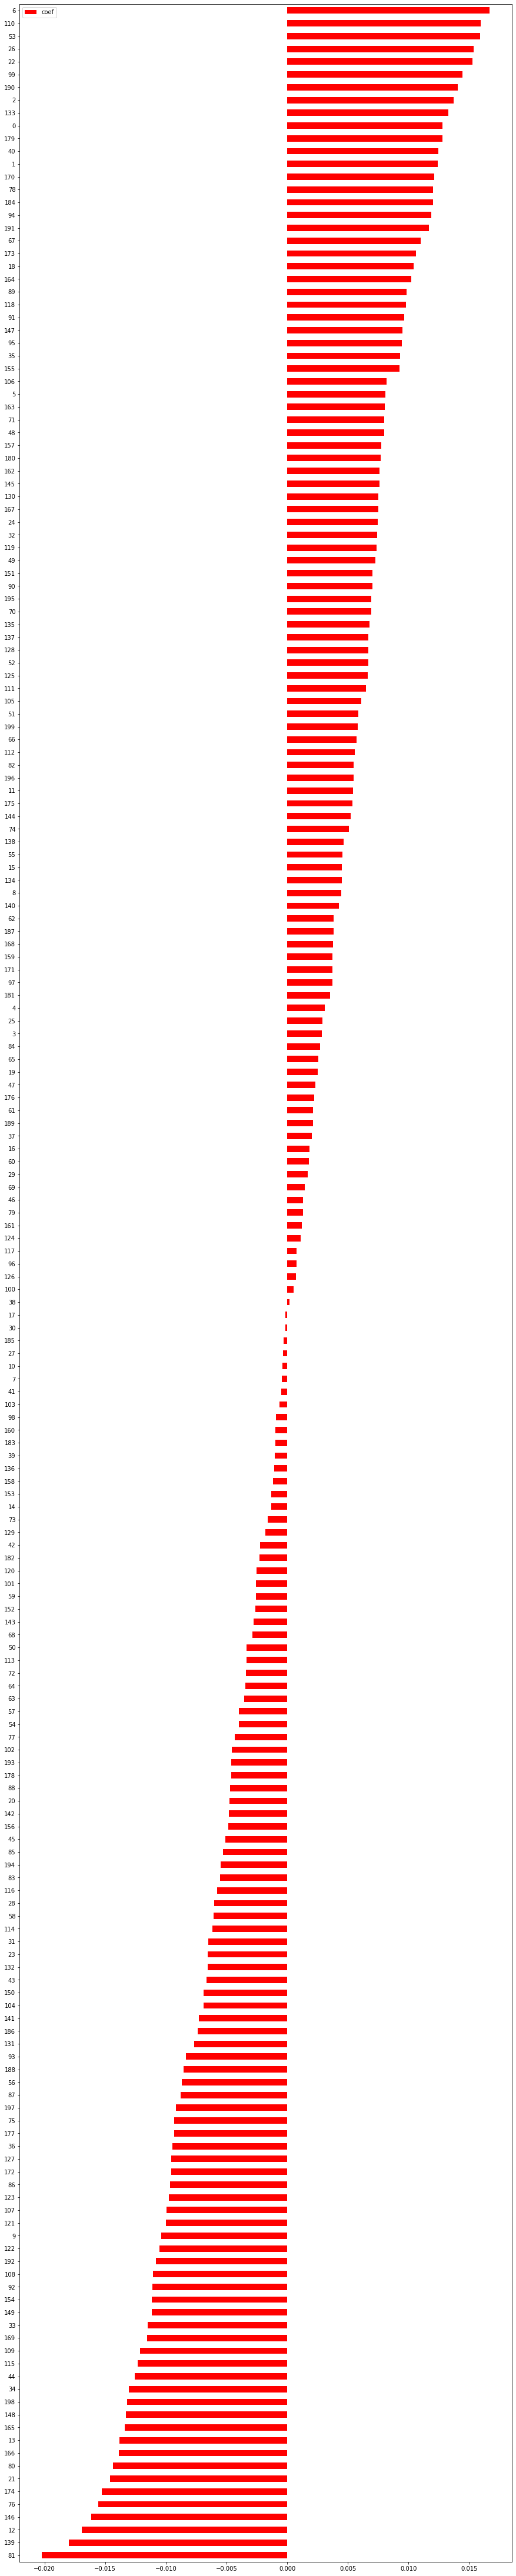

In [31]:
col = df_train.columns[1:]
coef = ridge.coef_
ridge_features = pd.DataFrame({"col":col, "coef":coef})
ridge_features.sort_values("coef").plot.barh(figsize=(15,80), color="red");

In [32]:
top20 = np.argsort(np.abs(coef))[180:]

In [33]:
coef20 = coef[top20]

In [34]:
feat20  = ridge_features["col"].iloc[top20]

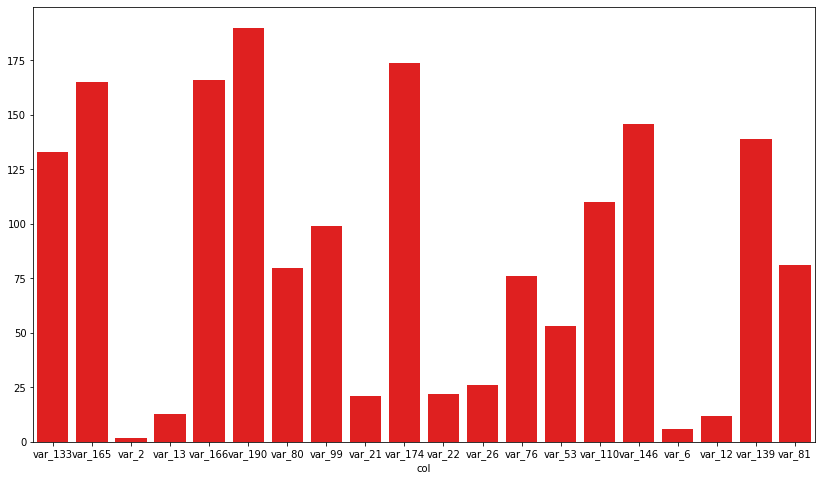

In [35]:
plt.figure(figsize=(14, 8))
sns.barplot(y= top20,x=feat20,color="red");

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)
random1 = np.random.randn(x_train.shape[0])
random2 = np.random.randn(x_test.shape[0])
x_train["random"] = random1
x_test["random"]  = random2

In [89]:
# permutation importance 
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200,random_state=123)
forest.fit(x_train, y_train)
result = permutation_importance(
         estimator=forest,
         x = x_test,
         y = y_test,
         scoring="accuracy",
         n_repeats=100,
         random_state=123)

TypeError: permutation_importance() got an unexpected keyword argument 'x'

In [ ]:
result = permutation_importance(
         estimator=forest,
         X = x_test,
         y = y_test,
         scoring="accuracy",
         n_repeats=10,
         random_state=123)

In [38]:
x_train.shape

(160000, 200)

In [47]:
np.r((np.random.randn(10), np.random.randn(10)))

TypeError: 'RClass' object is not callable

In [59]:
random1

array([ 1.65974583, -0.25079713,  0.56839209, ...,  0.51026096,
       -1.9420196 ,  0.25580919])

In [73]:
np.hstack((x_train, random1))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [79]:
np.concatenate((x_train,random1))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [85]:
random1.shape

(160000,)

In [86]:
x_train.shape

(160000, 200)

In [87]:
x_train

array([[ 11.4791,   0.4721,  11.6491, ...,   9.7471,  14.1922,  -3.8321],
       [  9.9893,   4.919 ,  17.1635, ...,   8.4768,  15.4487,  -2.1618],
       [ 12.8085,  -2.6705,   5.9245, ...,   8.6029,  15.2536,  -8.0695],
       ...,
       [ 11.0955,   1.4314,  12.2511, ...,   8.4935,  11.4685,  -1.775 ],
       [ 17.1434,  -4.5577,  12.5391, ...,   6.5953,  15.3739, -21.7187],
       [ 18.2109,  -8.4786,   7.6774, ...,   7.5021,  14.6191,  -6.8541]],
      dtype=float32)